Algoritmo Genético com Elitismo e Torneio

Função Seno


In [1]:
# genetic algorithm search for continuous function optimization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint, rand, uniform
from math import pi, sin
from IPython.display import clear_output
from time import sleep

In [2]:
def encode(float_string):
    encode = []
    float_string = float_string.split(".")
    for i in float_string:
        temp = []
        for j in i:
            temp.append(int(j))
        encode.append(temp)
    return encode


def decode(list_float_string):
    tempR = []
    for i in list_float_string:
        temp = ""
        for j in i:
            temp += str(j)
        tempR.append(temp)
    return tempR[0] + "." + tempR[1]

In [3]:
def float_to_bin(num):
    if num < 0:
        num = abs(num)
        num = np.format_float_positional(num).split(".")
        zrs = ""
        for i in num[1]:
            if i == "0":
                zrs += "0"
            else:
                break
        if len(num[1]) == 0:
            num[1] = "0"
        num = "1" + bin(int(num[0]))[2:] + "." + zrs + bin(int(num[1]))[2:]
    else:
        num = abs(num)
        num = np.format_float_positional(num).split(".")
        zrs = ""
        for i in num[1]:
            if i == "0":
                zrs += "0"
            else:
                break
        if len(num[1]) == 0:
            num[1] = "0"
        num = "0" + bin(int(num[0]))[2:] + "." + zrs + bin(int(num[1]))[2:]
    return num


def bin_to_float(binary):
    if binary[0] == "0":
        binary = binary[1:]
        binary = binary.split(".")

        zrs = ""
        for i in binary[1]:
            if i == "0":
                zrs += "0"
            else:
                break
        return float(
            str(int(binary[0], 2)) + "." + zrs + str(int(binary[1], 2)))
    else:
        binary = binary[1:]
        binary = binary.split(".")
        zrs = ""
        for i in binary[1]:
            if i == "0":
                zrs += "0"
            else:
                break
        return -float(
            str(int(binary[0], 2)) + "." + zrs + str(int(binary[1], 2)))

In [4]:
def dataConvert(data):
    if type(data) == str:
        return bin_to_float(data)
    elif type(data) == float:
        return data
    elif type(data) == int:
        return float(data)
    else:
        return bin_to_float(decode(data))

In [5]:
def objective_Sen(cromossomos):
    global ruido
    _cromossomos = cromossomos.copy()
    resp = 0
    for i, j in enumerate(_cromossomos):
        _cromossomos[i] = dataConvert(j)
        resp += (_cromossomos[i]) * sin((_cromossomos[i]) * 10 * pi) + 1
    return (resp)

In [6]:
def tournament(amostra, maxQtd):
    while len(amostra) > maxQtd:
        while True:
            i1, i2 = randint(0, len(amostra), 2)
            if i1 != i2:
                break
        if amostra[i1][1] < amostra[i2][1]:
            amostra.pop(i1)
        else:
            amostra.pop(i2)

In [7]:
# Gera a primeira população com fitness das n dimensões restringindo o domínio da função.
def firstGenGenerator(objective, dim, minX, maxX, n_pop):
    amostra = []
    for _ in range(n_pop):
        bits = []
        for i in range(dim):
            bits.append(encode(float_to_bin(uniform(minX, maxX))))
        score = objective(bits)
        amostra.append([bits, score])
    return amostra

In [8]:
def moda(amostra, taxa_tolerancia):
    modas = []
    for individuo in amostra:
        temp_moda = []
        for individuo_2 in amostra:
            if individuo[1] * (
                    1 + taxa_tolerancia) >= individuo_2[1] and individuo[1] * (
                        1 - taxa_tolerancia) <= individuo_2[1]:
                temp_moda.append(individuo_2[1])
        modas.append([individuo[1], len(temp_moda) / len(amostra)])
    sorted(modas, key=lambda x: x[1], reverse=True)
    return modas[0]

In [9]:
def desvioPadrao(amostra, media=None):
    soma = 0
    if media is None:
        media = 0
        for x in amostra:
            media += x[1]
        media = media / len(amostra)
    for i, x in enumerate(amostra):
        soma += ((x[1] - media)**2)
    desvio = ((soma / (len(amostra) - 1))**0.5)
    return desvio

In [10]:
def info(amostra, difRuido=False):
    global ruido
    melhor = amostra[0][1]
    pior = amostra[0][1]
    media = 0
    soma = 0
    for x in amostra:
        if x[1] < melhor:
            melhor = x[1]
        if x[1] > pior:
            pior = x[1]
        media += x[1]
    media = media / len(amostra)

    desvio = desvioPadrao(amostra, media)
    print(
        f'\nMelhor = {np.format_float_positional(melhor)}, Pior = {np.format_float_positional(pior)}, Media = {np.format_float_positional(media)}, Desvio Padrão = {desvio}\n'
    )
    if difRuido:
        print(
            f'SEM RUIDO: Melhor  = {np.format_float_positional(melhor-ruido)}, Pior = {np.format_float_positional(pior-ruido)}, Media = {np.format_float_positional(media-ruido)}\n'
        )


In [11]:
# Função auxiliar para imprimir a amostra.
def defaultPrint(amostra, difRuido=False):
    global ruido
    for index, individuo in enumerate(amostra):
        p = ""
        for i in individuo[0]:
            p += np.format_float_positional(bin_to_float(decode(i))) + " | "
        print("Individuo: ", p)
        if not difRuido:
            print("Score: ", np.format_float_positional(individuo[1]), "\n")
        else:
            print("Score: ", np.format_float_positional(individuo[1]),
                  "\tScore sem ruido: ",
                  np.format_float_positional(individuo[1] - ruido), "\n")


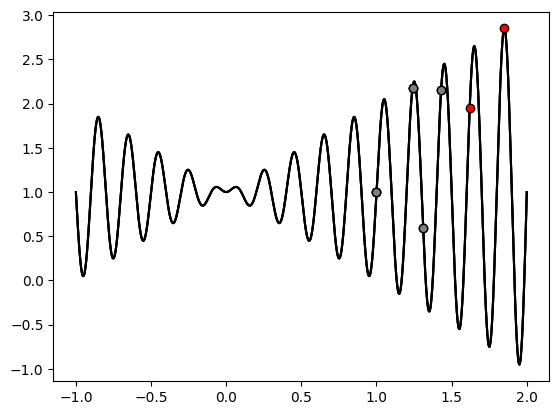

In [12]:
# MAKE IT A CLASS LATER
class Ploter2D:

    def __init__(self, func):
        self.func = func
        self.xDefaultFunction = []
        self.yDefaultFunction = []
        self.xOldValues = []
        self.yOldValues = []


    def setDefaultFunction(self, minX, maxX, step):
        maxX = maxX + step
        self.xDefaultFunction = []
        self.yDefaultFunction = []
        for i in np.arange(minX, maxX, step):
            i = float(i)
            self.xDefaultFunction.append(i)
            self.yDefaultFunction.append(self.func([i]))

    def plotDot(self, xValues, yValues=None):
        clear_output(wait=True)
        if yValues is None:
            yValues = []
            for i in xValues:
                yValues.append(self.func([i]))
        defaultFunction = pd.DataFrame({
            "x_values": self.xDefaultFunction,
            "y_values": self.yDefaultFunction
        })
        plt.plot(defaultFunction["x_values"],
                defaultFunction["y_values"],
                color="black")

        if len(self.xOldValues) > 0:
            oldDf = pd.DataFrame({
                "x_values": self.xOldValues,
                "y_values": self.yOldValues
            })
            plt.plot(
                oldDf["x_values"],
                oldDf["y_values"],
                color="gray",
                marker=".",
                markersize=12,
                linestyle="none",
                markeredgecolor="black",
            )

        dots = pd.DataFrame({"x_values": xValues, "y_values": yValues})
        plt.plot(
            dots["x_values"],
            dots["y_values"],
            color="red",
            marker=".",
            markersize=12,
            linestyle="none",
            markeredgecolor="black",
        )
        # plt.show()
        self.xOldValues += xValues
        self.yOldValues += yValues


cl = Ploter2D(objective_Sen)
cl.setDefaultFunction(-1, 2, 0.001)
cl.plotDot([1, 1.24])
cl.plotDot([1.31, 1.43])
cl.plotDot([1.62, 1.85])

In [13]:
def crossOver(individuo_1, individuo_2):
    if len(individuo_1[0]) > len(individuo_2[0]):
        for i in range(0, len(individuo_1[0]) - len(individuo_2[0])):
            individuo_2[0].insert(1, 0)
    elif len(individuo_1[0]) < len(individuo_2[0]):
        for i in range(0, len(individuo_2[0]) - len(individuo_1[0])):
            individuo_1[0].insert(1, 0)

    if len(individuo_1[1]) >= len(individuo_2[1]):
        for i in range(0, len(individuo_1[1]) - len(individuo_2[1])):
            individuo_2[1].append(0)
    else:
        for i in range(0, len(individuo_2[1]) - len(individuo_1[1])):
            individuo_1[1].append(0)
    filho_1 = [[], []]
    filho_2 = [[], []]
    ponto_de_corte = 1
    if 1 < (len(individuo_1[0]) - 1):
        ponto_de_corte = randint(1, len(individuo_1[0]) - 1)
    filho_1[0] = individuo_1[0][:ponto_de_corte] + \
        individuo_2[0][ponto_de_corte:]
    filho_2[0] = individuo_2[0][:ponto_de_corte] + \
        individuo_1[0][ponto_de_corte:]
    ponto_de_corte = randint(0, len(individuo_1[1]) - 1)
    filho_1[1] = individuo_1[1][:ponto_de_corte] + \
        individuo_2[1][ponto_de_corte:]
    filho_2[1] = individuo_2[1][:ponto_de_corte] + \
        individuo_1[1][ponto_de_corte:]
    return filho_1, filho_2


In [14]:
def mutacao(individuo, probMutacao):
    global mut
    stts = False
    for i in range(len(individuo)):
        for j in range(len(individuo[i])):
            if rand() <= probMutacao:
                stts = True
                individuo[i][j] = 1 if individuo[i][j] == 0 else 0
    if stts:
        mut += 1
    return individuo

In [15]:
def elitism(amostra):
    bestScore = amostra[0][1]
    bestIndex = 0
    for k, i in enumerate(amostra):
        if i[1] < bestScore:
            bestScore = i[1]
            bestIndex = k
    return amostra[bestIndex][0]

In [16]:
def iteracao(amostra, objective, minX, maxX, probMutacao):
    novos_bits = []
    elite = elitism(amostra)
    novos_bits.append(elite)

    for i, _ in enumerate(amostra):
        filho_1 = []
        filho_2 = []
        for j, _ in enumerate(amostra[0][0]):
            cromossomo_filho_1, cromossomo_filho_2 = crossOver(
                amostra[i][0][j], amostra[i][0][(j - len(amostra[0][0]) + 1)])
            filho_1.append(mutacao(cromossomo_filho_1, probMutacao))
            filho_2.append(mutacao(cromossomo_filho_2, probMutacao))
        novos_bits.append(filho_1)
        novos_bits.append(filho_2)
    nova_amostra = []

    for i in novos_bits:
        iRange = True
        for j in i:
            t = bin_to_float(decode(j))
            if t < minX or t > maxX:
                iRange = False
                break
        if iRange:
            nova_amostra.append([i, objective(i)])
        else:
            bits = []
            for _ in range(len(amostra[0][0])):
                bits.append(encode(float_to_bin(uniform(minX, maxX))))
            nova_amostra.append([bits, objective(bits)])
    return nova_amostra, elite

In [17]:
def geneticAlgorithm(
    amostra,
    objective,
    minX,
    maxX,
    maxPop,
    maxGen,
    taxa_tolerancia,
    taxaConvergencia,
    n_max_sem_melhora,
    probMutacao,
):
    global gen
    global mut
    gen = 0
    mut = 0
    nInt = 0
    oldElite = None
    ploter = Ploter2D(objective)
    ploter.setDefaultFunction(minX, maxX, 0.001)
    while gen < maxGen:  # Aqui podia sair quando chegar na resposta(se for conhecida)
        gen += 1
        # clear_output(wait=True)
        # progress = gen / maxGen * 100
        # print(f"{progress:.2f}%")
        amostra, tempElite = iteracao(amostra, objective, minX, maxX,
                                      probMutacao)
        if oldElite != None and objective(tempElite) == objective(oldElite):
            nInt += 1
        else:
            nInt = 0
        oldElite = tempElite
        tournament(amostra, maxPop)
        x = []
        y = []
        for i in amostra:
            x.append(bin_to_float(decode(i[0][0])))
            y.append(i[1])
        ploter.plotDot(x, y)

        convergencia = moda(amostra, taxa_tolerancia)
        if max(y)>=objective([1.8505474660415]):
            return amostra
        if convergencia[1] >= taxaConvergencia:
            print("convergencia: ", convergencia)
            return amostra
        if nInt >= n_max_sem_melhora:
            print("\nNúmero máximo de iterações sem melhora\n")
            return amostra
    return amostra


Populacao inicial: ------------------------------------------------------------------------------------------------------------

Melhor = -0.7201330596117714, Pior = 2.8238878066386413, Media = 1.0748460469998675, Desvio Padrão = 0.7883910076814354


Geração final: ----------------------------------------------------------------------------------------------------------------
Gerações:  1024
Mutações:  246414

Melhor = -0.6823681026827173, Pior = 2.8502719593525727, Media = 2.3129614591803365, Desvio Padrão = 0.7649692042553882



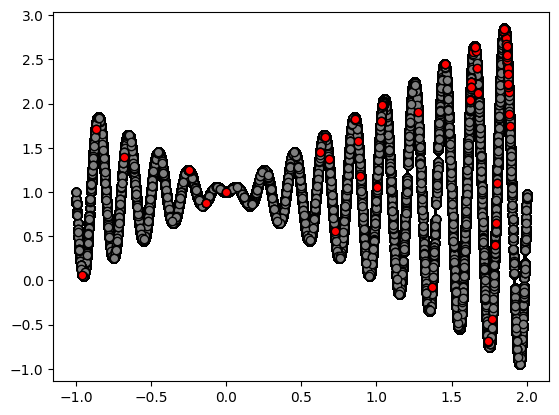

In [18]:
dim = 1
minX = -1
maxX = 2
maxPop = 2**7
maxGen = 2**10
taxa_tolerancia = 0
taxaConvergencia = 1.1
n_max_sem_melhora = 15
probMutacao = 0.05

amostraInit = firstGenGenerator(objective_Sen, dim, minX, maxX, maxPop)
amostraFin = amostraInit.copy()
amostraFin = geneticAlgorithm(amostraFin, objective_Sen, minX, maxX, maxPop,
                              maxGen, taxa_tolerancia, taxaConvergencia,
                              n_max_sem_melhora, probMutacao)

print(
    "\nPopulacao inicial: ------------------------------------------------------------------------------------------------------------"
)
info(amostraInit)
# # defaultPrint(amostraInit)

print(
    "\nGeração final: ----------------------------------------------------------------------------------------------------------------"
)
print("Gerações: ", gen)
print("Mutações: ", mut)
info(amostraFin)
# defaultPrint(amostraFin)
